# Imputing Missing Data

In [1]:
import random
import pandas as p
import numpy as n

# Data cleaning

In [2]:
df=p.read_csv('crx.data',header=None) #reading file

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [4]:
df.columns= ['A'+str(i) for i in range(1,len(df.columns)+1)] #Renaming the columns

In [5]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [6]:
df.replace('?',n.nan,inplace=True)
df['A16'].replace(['+','-'],[1,0],inplace=True) #changing the data in  columns

In [7]:
#making the more missing values
random.seed(9001)
s=set([n.random.randint(0,len(df)) for i in range(100)])
for i in ['A3', 'A8', 'A9', 'A10']:
    df.loc[s,i]=n.nan


In [8]:
df.isnull().sum().sum() #these much nul values we have

423

In [48]:
#changiing the datatypes
df.dtypes

A1      object
A2      object
A3     float64
A4      object
A5      object
A6      object
A7      object
A8     float64
A9      object
A10     object
A11      int64
A12     object
A13     object
A14     object
A15      int64
A16      int64
dtype: object

In [10]:
df['A2']=df['A2'].astype(float)
df['A14']=df['A14'].astype(float)

# Removing observations with missing data

In [35]:
df.isnull().mean().sort_values(ascending=False)*100 #percentage of null values of every column

A3     13.768116
A8     13.768116
A9     13.768116
A10    13.768116
A14     1.884058
A1      1.739130
A2      1.739130
A6      1.304348
A7      1.304348
A4      0.869565
A5      0.869565
A11     0.000000
A12     0.000000
A13     0.000000
A15     0.000000
A16     0.000000
dtype: float64

In [39]:
#dropping the null values
df1=df.dropna() #data with no null values
print(f"Number of column with null values {df.shape[0]}")
print(f"Number of column after removing null values {df1.shape[0]}")
#number of row after removing the null values should be less as we can see


Number of column with null values 690
Number of column after removing null values 562


# Performing mean or median imputation

In [12]:
#splitting the data before doing imputation because of data leakage
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
 df.drop('A16', axis=1), df['A16'], test_size=0.3,
 random_state=0)  

In [42]:
print(f'X_train shape - {X_train.shape}')
print(f'X_test shape - {X_test.shape}')
print(f'y_train shape - {y_train.shape}')
print(f'y_test shape - {y_test.shape}')

X_train shape - (483, 15)
X_test shape - (207, 15)
y_train shape - (483,)
y_test shape - (207,)


In [44]:
X_train.isnull().mean()*100
#percentage of null values in X_train data

A1      0.828157
A2      2.277433
A3     12.836439
A4      0.828157
A5      0.828157
A6      0.828157
A7      0.828157
A8     12.836439
A9     12.836439
A10    12.836439
A11     0.000000
A12     0.000000
A13     0.000000
A14     1.449275
A15     0.000000
dtype: float64

In [13]:
#selecting the numerical columns
num=[i for i in X_train.columns if X_train[i].dtype!='O']
#selecting the categorical columns
cat=[i for i in X_train.columns if X_train[i].dtype=='O']

In [27]:
#filling the numerical columns with mean 
for i in num:
    X_train[i].fillna(X_train[i].mean(),inplace=True) #filling the train data with mean
    X_test[i].fillna(X_train[i].mean(),inplace=True)  #filling test data with train data mean

In [25]:
#filling the categorical columns with mode
for i in cat:
    X_train[i].fillna(X_train[i].mode()[0],inplace=True) #filling the train data with mean
    X_test[i].fillna(X_train[i].mode()[0],inplace=True)
    

In [28]:
X_train.isnull().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
dtype: int64

In [29]:
#using sklearn library for this process
from sklearn.impute import SimpleImputer

In [113]:
X_train, X_test, y_train, y_test = train_test_split(
df[num], df['A16'], test_size=0.3,
random_state=0)


In [114]:
imputer=SimpleImputer(strategy='mean') #use mean for numerical data
imputer.fit(X_train)
imputer.statistics_


array([ 31.89019068,   4.93610588,   2.50014118,   2.51759834,
       180.57352941, 966.25258799])

In [115]:
X_train=imputer.transform(X_train) #filling mean
X_test= imputer.transform(X_test)


In [116]:
X_train1, X_test1, y_train, y_test = train_test_split(
df[cat], df['A16'], test_size=0.3,
random_state=0) #spitting again for categorica data

In [117]:
imputer=SimpleImputer(strategy='most_frequent') #use mode for categorical  data
imputer.fit(X_train1)
imputer.statistics_

array(['b', 'u', 'g', 'c', 'v', 't', 'f', 'f', 'g'], dtype=object)

In [118]:
X_train1=imputer.transform(X_train1) #filling mode
X_test1= imputer.transform(X_test1)


In [119]:
#combining both categorical and numerical columns after imputation
X_train=p.concat([p.DataFrame(X_train,columns=num),p.DataFrame(X_train1,columns=cat)],axis=1)

In [120]:
X_train.head()

,A2,A3,A8,A11,A14,A15,A1,A4,A5,A6,A7,A9,A10,A12,A13
0,46.08,3.000,2.375,8.0,396.0,4159.0,a,u,g,c,v,t,t,t,g
1,15.92,2.875,0.085,0.0,120.0,0.0,a,u,g,q,v,f,f,f,g
2,36.33,2.125,0.085,1.0,50.0,1187.0,b,y,p,w,v,t,t,f,g
3,22.17,0.585,0.000,0.0,100.0,0.0,b,y,p,ff,ff,f,f,f,g
4,57.83,7.040,14.000,6.0,360.0,1332.0,b,u,g,m,v,t,t,t,g


# Replacing missing values with an arbitrary number


In [121]:
X_train, X_test, y_train, y_test = train_test_split(
 df.drop('A16', axis=1), df['A16'], test_size=0.3,
 random_state=0)
#Normally, we select arbitrary values that are bigger than the maximum value of the distribution.

In [122]:
X_train[['A2','A3', 'A8', 'A11']].max()


A2     76.75
A3     28.00
A8     28.50
A11    67.00
dtype: float64

In [123]:
for i in ['A2','A3', 'A8', 'A11']:
    X_train.fillna(99,inplace=True)
    X_test.fillna(99,inplace=True)
#We chose 99 as the arbitrary value because it is bigger than the maximum value of these variables.

In [124]:
#using sklearn 
from sklearn.impute import SimpleImputer
X_train, X_test, y_train, y_test = train_test_split(
 df[num], df['A16'], test_size=0.3,
 random_state=0)


In [128]:
imputer=SimpleImputer(strategy='constant',fill_value=99)

In [129]:
imputer.fit(X_train)
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)
#imputation is done

# Capturing missing values in a bespoke category


In [131]:
X_train, X_test, y_train, y_test = train_test_split(
 df[cat], df['A16'], test_size=0.3,
 random_state=0)


In [133]:
#imputating the missing values with 'Missing' in categorical data
for i in X_train.columns:
    X_train.fillna('Missing',inplace=True)
    X_test.fillna('Missing',inplace=True)

In [134]:
#using sklearn
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='constant',fill_value='Missing')

In [136]:
imputer.fit(X_train)
X_train=imputer.transform(X_train)
X_test=imputer.transform(X_test)

# Replacing missing values with a value at the end of the distribution

In [147]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(
 df.drop('A16', axis=1), df['A16'], test_size=0.3,
 random_state=0)

In [144]:
#Imputating with IQR if it is not gaussian distribution
for i in ['A2', 'A3', 'A8', 'A11', 'A15']:
    IQR=X_train[i].quantile(0.75)-X_train[i].quantile(0.25)
    value=X_train[i].quantile(0.75)+1.5*(IQR)
    X_train[i]=X_train[i].fillna(value)
    X_test[i]=X_test[i].fillna(value)


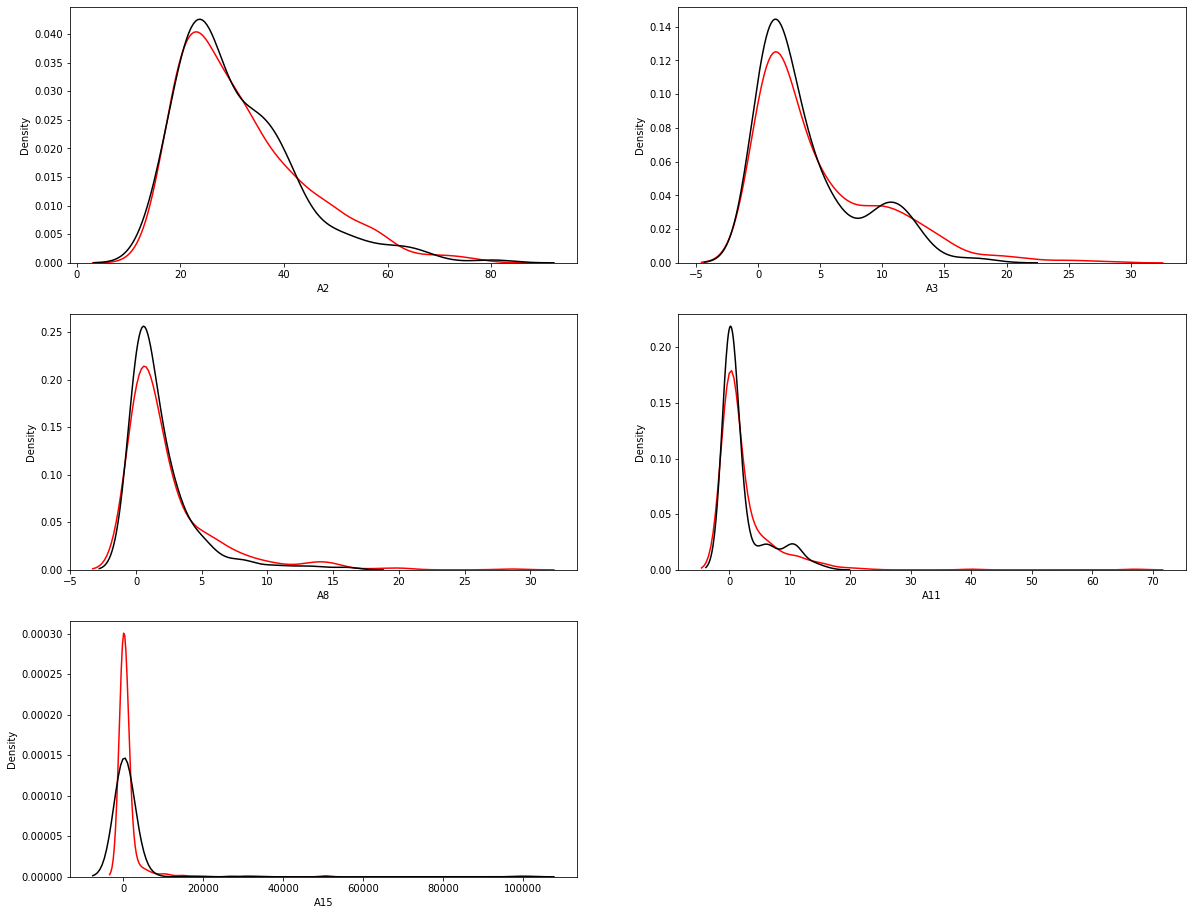

In [141]:
#Distribution before imputation
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,16))
l=['A2', 'A3', 'A8', 'A11', 'A15']
for i in range(len(l)):
    plt.subplot(3,2,i+1)
    sns.kdeplot(X_train[l[i]],color='red')
    sns.kdeplot(X_test[l[i]],color='black')
    

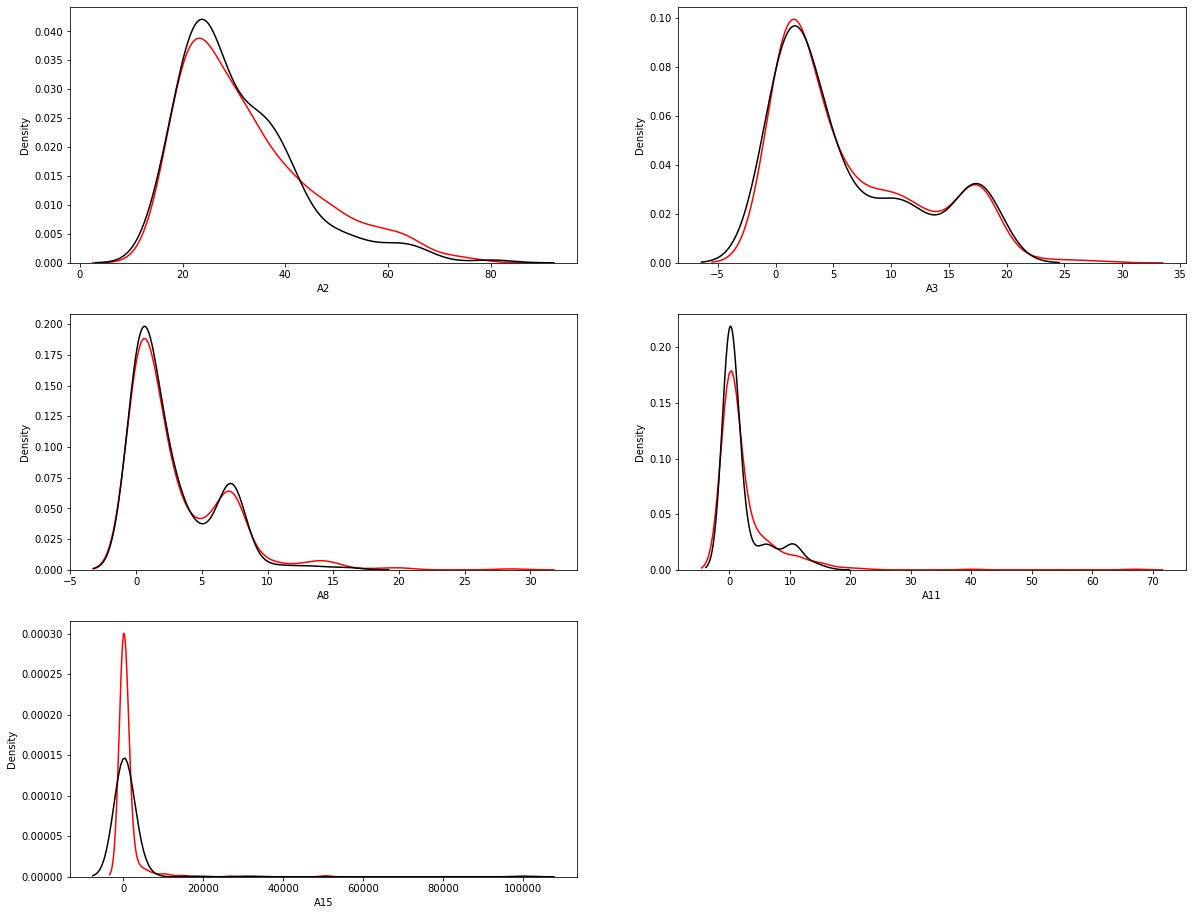

In [145]:
#Distribution after imputation
plt.figure(figsize=(20,16))
l=['A2', 'A3', 'A8', 'A11', 'A15']
for i in range(len(l)):
    plt.subplot(3,2,i+1)
    sns.kdeplot(X_train[l[i]],color='red')
    sns.kdeplot(X_test[l[i]],color='black')

In [148]:
#Doing the with mean and standard deviation
for i in ['A2', 'A3', 'A8', 'A11', 'A15']:
    value=X_train[i].mean()+3*X_train[i].std()
    X_train[i]=X_train[i].fillna(value)
    X_test[i]=X_test[i].fillna(value)


# Implementing random sample imputation

In [200]:
X_train, X_test, y_train, y_test = train_test_split(
 df.drop('A16', axis=1), df['A16'], test_size=0.3,
 random_state=0)

In [9]:
l=[i for i in dict(df.isnull().sum()) if dict(df.isnull().sum())[i]!=0] #select those columns that have null values

In [202]:
for i in l:
    #train dataset
    n=X_train[i].isnull().sum() #this will give the number of null values in that columns
    array=X_train[i].dropna().sample(n,random_state=0).values #it will extract n random values from columns without null values
    X_train.loc[X_train[i].isnull(),[i]]=array #this will replace those null values present in that columns with random values in array
    #test dataset
    n=X_test[i].isnull().sum()
    array=X_train[i].dropna().sample(n).values #we will extract random values from train  dataset
    X_test.loc[X_test[i].isnull(),[i]]=array

# Adding a missing value indicator variable

In [123]:
X_train, X_test, y_train, y_test = train_test_split(
 df.drop('A16', axis=1), df['A16'], test_size=0.3,
 random_state=0)
    

In [208]:
for i in l:
    X_train[i+'_nan']=n.where(X_train[i].isnull(),1,0) #It will create new column if variable contains missing value it will give 1 otherwise 0
    X_test[i+'_nan']=n.where(X_test[i].isnull(),1,0)

In [209]:
X_train.head() #extra columns with details

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A2_nan,A3_nan,A4_nan,A5_nan,A6_nan,A7_nan,A8_nan,A9_nan,A10_nan,A14_nan
596,a,46.08,3.000,u,g,c,v,2.375,t,t,...,0,0,0,0,0,0,0,0,0,0
303,a,15.92,2.875,u,g,q,v,0.085,f,f,...,0,0,0,0,0,0,0,0,0,0
204,b,36.33,2.125,y,p,w,v,0.085,t,t,...,0,0,0,0,0,0,0,0,0,0
351,b,22.17,0.585,y,p,ff,ff,0.000,f,f,...,0,0,0,0,0,0,0,0,0,0
118,b,57.83,7.040,u,g,m,v,14.000,t,t,...,0,0,0,0,0,0,0,0,0,0


In [218]:
#verifying that we have give right indication
for i in l:
    j=i+'_nan'
    print(f'{X_train[i].isnull().sum()} : {X_train[j].sum()}')

4 : 4
11 : 11
58 : 58
4 : 4
4 : 4
4 : 4
4 : 4
58 : 58
58 : 58
58 : 58
7 : 7


In [23]:
from sklearn.impute import MissingIndicator

In [42]:
indcator=MissingIndicator(features='missing-only')

In [43]:
indcator.fit(X_train)

MissingIndicator()

In [44]:
indcator.features_ #these are the indexes of columns with missing values in list  X_train.columns 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 13], dtype=int64)

In [46]:
col=[X_train.columns[i]+'_nan' for i in indcator.features_] 

In [125]:
X_train=p.concat([X_train.reset_index(drop=True),p.DataFrame(indcator.transform(X_train),columns=col)],axis=1)
X_train.head()
#After this we can substitue it with mean or median or any other way

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A2_nan,A3_nan,A4_nan,A5_nan,A6_nan,A7_nan,A8_nan,A9_nan,A10_nan,A14_nan
0,a,46.08,3.000,u,g,c,v,2.375,t,t,...,False,False,False,False,False,False,False,False,False,False
1,a,15.92,2.875,u,g,q,v,0.085,f,f,...,False,False,False,False,False,False,False,False,False,False
2,b,36.33,2.125,y,p,w,v,0.085,t,t,...,False,False,False,False,False,False,False,False,False,False
3,b,22.17,NaN,y,p,ff,ff,NaN,NaN,NaN,...,False,True,False,False,False,False,True,True,True,False
4,b,57.83,7.040,u,g,m,v,14.000,t,t,...,False,False,False,False,False,False,False,False,False,False


In [124]:
X_test=p.concat([X_test.reset_index(drop=True),p.DataFrame(indcator.transform(X_test),columns=col)],axis=1)
X_test.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A2_nan,A3_nan,A4_nan,A5_nan,A6_nan,A7_nan,A8_nan,A9_nan,A10_nan,A14_nan
0,a,45.83,10.50,u,g,q,v,5.000,t,t,...,False,False,False,False,False,False,False,False,False,False
1,b,64.08,20.00,u,g,x,h,17.500,t,t,...,False,False,False,False,False,False,False,False,False,False
2,a,31.25,3.75,u,g,cc,h,0.625,t,t,...,False,False,False,False,False,False,False,False,False,False
3,b,39.25,9.50,u,g,m,v,6.500,t,t,...,False,False,False,False,False,False,False,False,False,False
4,a,26.17,2.00,u,g,j,j,0.000,f,f,...,False,False,False,False,False,False,False,False,False,False


In [64]:
#here we are imputing the missing values with mean and showing indication
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='mean',add_indicator=True)

In [67]:
imputer.fit(X_train[num])

SimpleImputer(add_indicator=True)

In [70]:
p.DataFrame(imputer.transform(X_train[num]))

,0,1,2,3,4,5,6,7,8,9
0,46.08,3.000000,2.375000,8.0,396.0,4159.0,0.0,0.0,0.0,0.0
1,15.92,2.875000,0.085000,0.0,120.0,0.0,0.0,0.0,0.0,0.0
2,36.33,2.125000,0.085000,1.0,50.0,1187.0,0.0,0.0,0.0,0.0
3,22.17,5.041915,2.534504,0.0,100.0,0.0,0.0,1.0,1.0,0.0
4,57.83,7.040000,14.000000,6.0,360.0,1332.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
478,36.75,4.710000,0.000000,0.0,160.0,0.0,0.0,0.0,0.0,0.0
479,41.75,0.960000,2.500000,0.0,510.0,600.0,0.0,0.0,0.0,0.0
480,19.58,0.665000,1.665000,0.0,220.0,5.0,0.0,0.0,0.0,0.0
481,22.83,5.041915,2.534504,7.0,140.0,2384.0,0.0,1.0,1.0,0.0


In [73]:
p.DataFrame(imputer.transform(X_test[num]))

,0,1,2,3,4,5,6,7,8,9
0,45.83,10.50,5.000,7.0,0.0,0.0,0.0,0.0,0.0,0.0
1,64.08,20.00,17.500,9.0,0.0,1000.0,0.0,0.0,0.0,0.0
2,31.25,3.75,0.625,9.0,181.0,0.0,0.0,0.0,0.0,0.0
3,39.25,9.50,6.500,14.0,240.0,4607.0,0.0,0.0,0.0,0.0
4,26.17,2.00,0.000,0.0,276.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
202,28.67,1.04,2.500,5.0,300.0,1430.0,0.0,0.0,0.0,0.0
203,43.17,5.00,2.250,0.0,141.0,0.0,0.0,0.0,0.0,0.0
204,21.42,0.75,0.750,0.0,132.0,2.0,0.0,0.0,0.0,0.0
205,26.83,0.54,0.000,0.0,100.0,0.0,0.0,0.0,0.0,0.0


# Assembling an imputation  with scikit-learn


In [102]:
from sklearn.compose import ColumnTransformer #this will excute diffrent imputation on different columns and then give concated result
X_train, X_test, y_train, y_test = train_test_split(
 df.drop('A16', axis=1), df['A16'], test_size=0.3,
 random_state=0)


In [90]:
features_num_arbitrary = ['A3', 'A8']
features_num_median = ['A2', 'A14']
features_cat_frequent = ['A4', 'A5', 'A6', 'A7']
features_cat_missing = ['A1', 'A9', 'A10']

In [106]:
from sklearn.impute import SimpleImputer
median=SimpleImputer(strategy='median')
mode=SimpleImputer(strategy="most_frequent")
missing=SimpleImputer(strategy='constant',fill_value='Missing')
constant=SimpleImputer(strategy='constant',fill_value=100)

In [118]:
pro=ColumnTransformer(transformers=[('median',median,features_num_median)
                                   ,('mode',mode,features_cat_frequent)
                                   ,('missing',missing,features_cat_missing)
                                   ,('constant',constant,features_num_arbitrary)
                                   ], remainder='passthrough')

In [119]:
pro.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('median', SimpleImputer(strategy='median'),
                                 ['A2', 'A14']),
                                ('mode',
                                 SimpleImputer(strategy='most_frequent'),
                                 ['A4', 'A5', 'A6', 'A7']),
                                ('missing',
                                 SimpleImputer(fill_value='Missing',
                                               strategy='constant'),
                                 ['A1', 'A9', 'A10']),
                                ('constant',
                                 SimpleImputer(fill_value=100,
                                               strategy='constant'),
                                 ['A3', 'A8'])])

In [122]:
p.DataFrame(pro.transform(X_train)).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,46.08,396.0,u,g,c,v,a,t,t,3.0,2.375,8,t,g,4159
1,15.92,120.0,u,g,q,v,a,f,f,2.875,0.085,0,f,g,0
2,36.33,50.0,y,p,w,v,b,t,t,2.125,0.085,1,f,g,1187
3,22.17,100.0,y,p,ff,ff,b,Missing,Missing,100.0,100.0,0,f,g,0
4,57.83,360.0,u,g,m,v,b,t,t,7.04,14.0,6,t,g,1332


# Performing multivariate imputation KNN

In [126]:
X_train, X_test, y_train, y_test = train_test_split(
 df.drop('A16', axis=1), df['A16'], test_size=0.3,
 random_state=0)

In [127]:
from sklearn.impute import KNNImputer
knn=KNNImputer(n_neighbors=5) # here it will take average of 5 nearest neighbour 

In [130]:
knn.fit(X_train[num])

KNNImputer()

In [132]:
knn.transform(X_train[num])

array([[4.608e+01, 3.000e+00, 2.375e+00, 3.960e+02],
       [1.592e+01, 2.875e+00, 8.500e-02, 1.200e+02],
       [3.633e+01, 2.125e+00, 8.500e-02, 5.000e+01],
       ...,
       [1.958e+01, 6.650e-01, 1.665e+00, 2.200e+02],
       [2.283e+01, 3.659e+00, 3.740e-01, 1.400e+02],
       [4.058e+01, 3.290e+00, 3.500e+00, 4.000e+02]])